In [1]:


# 1. Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# 2. Load Data
# Make sure these CSV files are in the same directory
intern_df = pd.read_csv('intern_skills.csv')
jobs_df = pd.read_csv('job_descriptions.csv')

Top skills per industry cluster:
Cluster 0: rest, requires, docker, api, know
Cluster 1: learning, machine, python, sql, nlp
Cluster 2: iot, microcontrollers, experience, systems, embedded

Skill Gap Analysis Results:
    Intern                 Current Skills  \
0    Alice   Python, Data Analysis, Excel   
1      Bob         Java, Spring Boot, SQL   
2  Charlie          HTML, CSS, JavaScript   
3    Diana  Python, Machine Learning, SQL   
4    Ethan  C++, Embedded Systems, MATLAB   

                              Missing Skills         Suggested Training  
0  deep, spring, tensorflow, systems, expert   deep, spring, tensorflow  
1     deep, tensorflow, systems, expert, nlp  deep, tensorflow, systems  
2  deep, spring, tensorflow, systems, expert   deep, spring, tensorflow  
3  deep, spring, tensorflow, systems, expert   deep, spring, tensorflow  
4      deep, spring, tensorflow, expert, nlp   deep, spring, tensorflow  


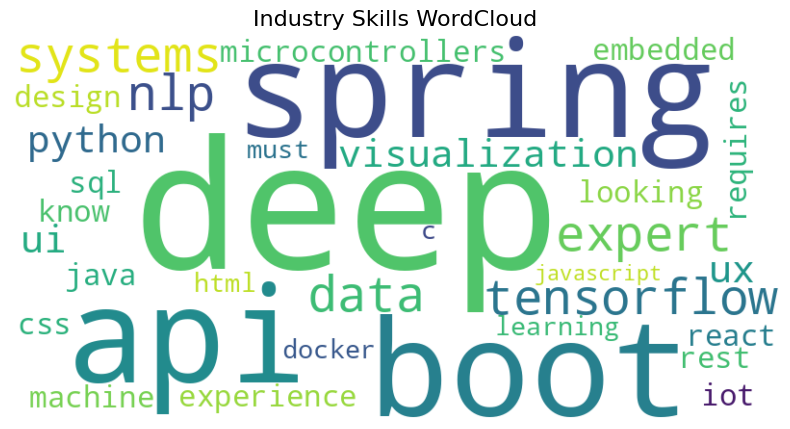

In [3]:
# 3. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
all_text = pd.concat([intern_df['Skills'], jobs_df['Description']])
tfidf_matrix = vectorizer.fit_transform(all_text)

# Split into intern and job vectors
intern_tfidf = tfidf_matrix[:len(intern_df)]
job_tfidf = tfidf_matrix[len(intern_df):]

# 4. K-Means Clustering on Job Descriptions
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(job_tfidf)

terms = vectorizer.get_feature_names_out()
cluster_top_skills = {}
for i in range(3):
    cluster_indices = np.argsort(kmeans.cluster_centers_[i])[::-1][:5]
    cluster_top_skills[i] = [terms[idx] for idx in cluster_indices]

print("Top skills per industry cluster:")
for cluster, skills in cluster_top_skills.items():
    print(f"Cluster {cluster}: {', '.join(skills)}")

# 5. Skill Gap Analysis
def clean_skill_set(text):
    return set([w.strip().lower() for w in text.replace(',', '').split()])

industry_skills = set()
for desc in jobs_df['Description']:
    industry_skills.update(clean_skill_set(desc))

results = []
for _, row in intern_df.iterrows():
    intern_skills_set = clean_skill_set(row['Skills'])
    missing = list(industry_skills - intern_skills_set)
    results.append({
        'Intern': row['Intern'],
        'Current Skills': row['Skills'],
        'Missing Skills': ', '.join(missing[:5]),
        'Suggested Training': ', '.join(missing[:3])
    })

gap_df = pd.DataFrame(results)
print("\nSkill Gap Analysis Results:")
print(gap_df)

# 6. Visualization: WordCloud of Industry Skills
wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(list(industry_skills)))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Industry Skills WordCloud', fontsize=16)
plt.show()